# ChEMBL webresource client examples

The library helps to access ChEMBL data and cheminformatics tools from Python. You don't need to know how to write SQL. You don't need to know how to interact with REST APIs. You don't need to compile or install any cheminformatics frameworks. Results are cached.

The client handles interaction with the HTTPS protocol and caches all results in the local file system for faster retrieval. Abstracting away all network-related tasks, the client provides the end user with a convenient interface, giving the impression of working with a local resource. The design is based on the Django QuerySet interface. The client also implements lazy evaluation of results, which means it will only evaluate a request for data when a value is required. This approach reduces the number of network requests and increases performance.

1. [Compounds](#section1)
1. [Drugs](#section2)
1. [Targets](#section3)
1. [Activities](#section4)
1. [Assays](#section5)
1. [Tissues](#section6)
1. [Cells](#section7)
1. [Utils](#section8)

## Available data entities

You can list available data entities using the following code

In [1]:
from chembl_webresource_client.new_client import new_client

available_resources = [resource for resource in dir(new_client) if not resource.startswith('_')]
print(available_resources)

['activity', 'activity_supplementary_data_by_activity', 'assay', 'assay_class', 'atc_class', 'binding_site', 'biotherapeutic', 'cell_line', 'chembl_id_lookup', 'compound_record', 'compound_structural_alert', 'description', 'document', 'document_similarity', 'drug', 'drug_indication', 'drug_warning', 'go_slim', 'image', 'mechanism', 'metabolism', 'molecule', 'molecule_form', 'official', 'organism', 'protein_class', 'similarity', 'source', 'substructure', 'target', 'target_component', 'target_relation', 'tissue', 'xref_source']


## Available filters

The design of the client is based on Django QuerySet (https://docs.djangoproject.com/en/1.11/ref/models/querysets) and most important lookup types are supported. These are:

- exact
- iexact
- contains
- icontains
- in
- gt
- gte
- lt
- lte
- startswith
- istartswith
- endswith
- iendswith
- range
- isnull
- regex
- iregex

## `Only` operator

`only` is a special method that limits the results to a selected set of database fields. `only` takes a list of fields (as a single argument) to be included in the results. Note that the specified fields have to exist in the API endpoint against which `only` is executed. Using `only` normally makes an API call faster because less information returned will save bandwidth. The API logic will also check if any SQL joins are necessary to return the specified field(s) and will exclude unnecessary joins which critically improves performance.

Please note that `only` has one limitation: any specified fields will ignore nested fields i.e. calling only(['molecule_properties__alogp']) is equivalent to only(['molecule_properties']).

For many-to-many relationships `only` will not make any SQL join optimisation.

# 1. Compounds<a name="section1"></a>
- Compounds in ChEMBL usually have associated bioactivity data. For example, the activity of a compound may have been measured in an experiment against a particular target and results in a certain IC50 value that has been published in the scientific literature.

- Compound records may be retrieved in a number of ways, such as a lookup of an individual compound using various identifiers or by searching for compounds via similarity.

## Find a compound by pref_name using the `molecule` endpoint
- Note the double underscore to filter for a (case insensitive) `iexact` name match within the 'pref_name' database field

In [2]:
from chembl_webresource_client.new_client import new_client #Import ChEMBL python client

molecule = new_client.molecule
mols = molecule.filter(pref_name__iexact='aspirin')
mols

[{'atc_classifications': ['B01AC06', 'N02BA01', 'N02BA51', 'A01AD05', 'N02BA71'], 'availability_type': 2, 'biotherapeutic': None, 'black_box_warning': 0, 'chebi_par_id': 15365, 'chirality': 2, 'cross_references': [{'xref_id': 'aspirin', 'xref_name': 'aspirin', 'xref_src': 'DailyMed'}, {'xref_id': '144203627', 'xref_name': 'SID: 144203627', 'xref_src': 'PubChem'}, {'xref_id': '144209315', 'xref_name': 'SID: 144209315', 'xref_src': 'PubChem'}, {'xref_id': '144210466', 'xref_name': 'SID: 144210466', 'xref_src': 'PubChem'}, {'xref_id': '170465039', 'xref_name': 'SID: 170465039', 'xref_src': 'PubChem'}, {'xref_id': '17389202', 'xref_name': 'SID: 17389202', 'xref_src': 'PubChem'}, {'xref_id': '17390036', 'xref_name': 'SID: 17390036', 'xref_src': 'PubChem'}, {'xref_id': '174007205', 'xref_name': 'SID: 174007205', 'xref_src': 'PubChem'}, {'xref_id': '26747283', 'xref_name': 'SID: 26747283', 'xref_src': 'PubChem'}, {'xref_id': '26752858', 'xref_name': 'SID: 26752858', 'xref_src': 'PubChem'}, {'

## Find a compound by its synonyms

- In some cases a compound may be more commonly known by a synonym than its preferred name in ChEMBL (pref_name)
- The 'molecule_synonym' field is nested within the 'molecule_synonyms' field hence the first double underscore, followed by a second double underscore to filter for a (case insensitive) iexact name match within the 'pref_name' database field
- Use the `only` method to specify which database fields you want to be included in response

In [3]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_synonyms__molecule_synonym__iexact='viagra').only('molecule_chembl_id')
mols

[{'molecule_chembl_id': 'CHEMBL192'}, {'molecule_chembl_id': 'CHEMBL1737'}]

## Get a single compound by ChEMBL id

- All the main entities in the ChEMBL database have a ChEMBL ID. This is a stable identifier designed for straightforward lookup of data.

In [4]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
m1 = molecule.filter(chembl_id='CHEMBL192').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
m1

[{'molecule_chembl_id': 'CHEMBL192', 'molecule_structures': {'canonical_smiles': 'CCCc1nn(C)c2c(=O)[nH]c(-c3cc(S(=O)(=O)N4CCN(C)CC4)ccc3OCC)nc12', 'molfile': '\n     RDKit          2D\n\n 33 36  0  0  0  0  0  0  0  0999 V2000\n    2.1000   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.1000    0.7000    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.5375   -0.0042    0.0000 S   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917   -0.3667    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792   -0.0042    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042    0.9083    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4917    1.0625    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.8792    0.6833    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    3.2042    0.3458    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    2.8042   -0.2417    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.2875   -0.3750    0.0000 C   0  0  0  0  0  0  0  0  0  

## Get many compounds using a list of their identifiers (ChEMBL_id)
- Use the double underscore followed by the `in` keyword to find a list of molecule_chembl_id's

In [5]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mols = molecule.filter(molecule_chembl_id__in=['CHEMBL25', 'CHEMBL192', 'CHEMBL27']).only(['molecule_chembl_id', 'pref_name'])
mols

[{'molecule_chembl_id': 'CHEMBL25', 'pref_name': 'ASPIRIN'}, {'molecule_chembl_id': 'CHEMBL27', 'pref_name': 'PROPRANOLOL'}, {'molecule_chembl_id': 'CHEMBL192', 'pref_name': 'SILDENAFIL'}]

## Display a compound image using the `image` endpoint

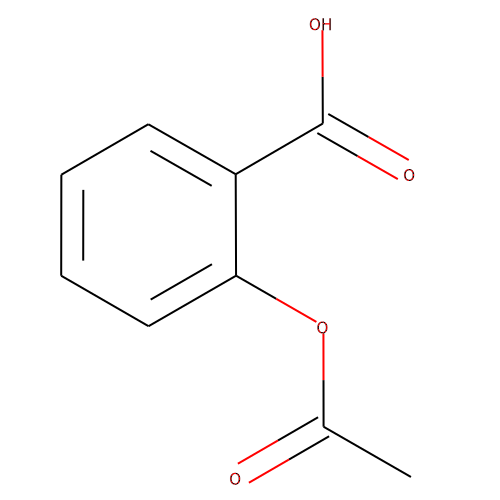

In [6]:
from chembl_webresource_client.new_client import new_client
from IPython.display import SVG

image = new_client.image
image.set_format('svg')
SVG(image.get('CHEMBL25'))

## Get a single compound by standard inchi key

In [7]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
mol = molecule.filter(molecule_structures__standard_inchi_key='BSYNRYMUTXBXSQ-UHFFFAOYSA-N').only(['molecule_chembl_id', 'pref_name', 'molecule_structures'])
mol

[{'molecule_chembl_id': 'CHEMBL25', 'molecule_structures': {'canonical_smiles': 'CC(=O)Oc1ccccc1C(=O)O', 'molfile': '\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n    8.8810   -2.1206    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    8.8798   -2.9479    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.5946   -3.3607    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3110   -2.9474    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3081   -2.1170    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    9.5928   -1.7078    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0210   -1.7018    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.7369   -2.1116    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0260   -3.3588    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   11.0273   -4.1837    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   11.7423   -4.5949    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   10.3136   -4.5972    0.0000 O 

## Find compounds similar to a given SMILES query, with a similarity threshold of 70% using the `similarity` endpoint

In [8]:
from chembl_webresource_client.new_client import new_client

similarity = new_client.similarity
res = similarity.filter(smiles="CO[C@@H](CCC#C\C=C/CCCC(C)CCCCC=C)C(=O)[O-]", similarity=70).only(['molecule_chembl_id', 'similarity'])
for i in res:
    print(i)

{'molecule_chembl_id': 'CHEMBL477888', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL477889', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL478779', 'similarity': '85.4166686534881591796875'}
{'molecule_chembl_id': 'CHEMBL2304268', 'similarity': '70.1754391193389892578125'}


## Find compounds similar to aspirin (CHEMBL25) with similarity threshold of 70% using the `similarity` endpoint
- Use pandas python module to view the result as a table of data

In [9]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data

similarity = new_client.similarity
res = similarity.filter(chembl_id='CHEMBL25', similarity=70).only(['molecule_chembl_id', 'pref_name', 'similarity'])
pd.DataFrame(res)

,molecule_chembl_id,pref_name,similarity
0,CHEMBL2296002,None,100
1,CHEMBL1697753,ASPIRIN DL-LYSINE,100
2,CHEMBL3833325,CARBASPIRIN CALCIUM,88.8888895511627197265625
3,CHEMBL3833404,CARBASPIRIN,88.8888895511627197265625
4,CHEMBL350343,DIPLOSALSALATE,85.7142865657806396484375
5,CHEMBL4515737,None,70.3703701496124267578125
6,CHEMBL1451173,DIPYROCETYL,69.9999988079071044921875


## Find compounds with the same connectivity

In [10]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data

molecule = new_client.molecule
res = molecule.filter(molecule_structures__canonical_smiles__connectivity='CN(C)C(=N)N=C(N)N').only(['molecule_chembl_id', 'pref_name'])
pd.DataFrame(res)

,molecule_chembl_id,pref_name
0,CHEMBL1431,METFORMIN
1,CHEMBL1703,METFORMIN HYDROCHLORIDE
2,CHEMBL3094198,None


## Get all biotherapeutic compounds

In [11]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
biotherapeutics = molecule.filter(biotherapeutic__isnull=False)
len(biotherapeutics)

22963

## Get compounds with molecular weight <= 300
- The `lte` keyword means 'less than or equal to'

In [12]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
light_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300)

len(light_molecules)

367682

## Get compounds with molecular weight <= 300 AND a pref_name ending with nib (ie a small molecule inhibitor)
- Note the double underscore to access the 'mw_freebase' database field that is nested within 'molecule_properties' field
- Multiple `filter` conditions can be combined into a list separated by ","

In [13]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

molecule = new_client.molecule
light_nib_molecules = molecule.filter(molecule_properties__mw_freebase__lte=300, pref_name__iendswith="nib").only(['molecule_chembl_id', 'pref_name'])

pd.DataFrame(light_nib_molecules)

,molecule_chembl_id,pref_name
0,CHEMBL276711,SEMAXANIB
1,CHEMBL4594348,ELSUBRUTINIB


## Get all compounds in ChEMBL with no Rule-of-Five violations

In [14]:
from chembl_webresource_client.new_client import new_client

molecule = new_client.molecule
no_violations = molecule.filter(molecule_properties__num_ro5_violations=0)
len(no_violations)

1441706

# 2. Drugs<a name="section2"></a>
- By contrast to compounds, marketed drugs and clinical candidates in ChEMBL normally have curated information for their synonyms, disease indication, mechanism of action, safety warnings etc, and do not necessarily have to have associated measured bioactivity data. 
- Clinical candidates are drugs that are progressing through Phases 1, 2 and 3 of the drug discovery pipeline, while approved drugs are considered to be Phase 4 (ie max_phase=4).
- Note that the data in the `drugs` API endpoint is aggregated onto the parent drug form within each compound family

## Filter drugs by approval year and name using the `drug` endpoint

In [15]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

drug = new_client.drug
res = drug.filter(first_approval__gte=1980).filter(usan_stem="-azosin").only(['development_phase','first_approval','molecule_chembl_id','synonyms',  'usan_stem','usan_stem_definition',  'usan_year'])
pd.DataFrame(res)

,applicants,atc_code_description,development_phase,first_approval,molecule_chembl_id,research_codes,synonyms,usan_stem,usan_stem_definition,usan_year
0,None,None,4,1987,CHEMBL611,None,"[Terazosin (BAN, INN, MI), Terazosin hydrochlo...",-azosin,antihypertensives (prazosin type),1980
1,None,None,4,1990,CHEMBL707,None,"[Doxazosin mesilate (JAN), Doxazosin mesylate ...",-azosin,antihypertensives (prazosin type),1981


## Find compounds that have been recently approved as marketed drugs and are immunosupressants
- Use the `molecule` endpoint to find compounds (an alternative would be to use the `drugs` endpoint)
- Use `order_by` to sort the result

In [17]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

molecule = new_client.molecule
approved_drugs = molecule.filter(max_phase=4 #approved drugs only
                                 , atc_classifications__level2='L04' #ATC classification as Immunosupressants
                                 , first_approval__gte=2020 #first_approval after 2020
                                ).order_by('first_approval').only(['atc_classifications','first_approval','indication_class','max_phase','pref_name','molecule_type', 'molecule_chembl_id'])

pd.DataFrame(approved_drugs) #Convert the list of results into a Pandas dataframe

,atc_classifications,first_approval,indication_class,max_phase,molecule_chembl_id,molecule_type,pref_name
0,[L04AA47],2020,None,4,CHEMBL2109334,Antibody,INEBILIZUMAB
1,[L04AA38],2020,None,4,CHEMBL3707247,Small molecule,OZANIMOD
2,[L04AC19],2020,None,4,CHEMBL3833307,Antibody,SATRALIZUMAB
3,[L04AD03],2021,None,4,CHEMBL2218919,Protein,VOCLOSPORIN


## Get Phase 3 clinical candidates for lung cancer, and examine their molecular properties
- First use the `drug_indication` API endpoint, specifying 'max_phase_for_ind' to be 3 (ie clinical candidates in Phase 3 progressing through the drug discovery pipeline for lung cancer)
- And then feed the results into the `molecule` API endpoint to extract their molecular properties

In [18]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

drug_indication = new_client.drug_indication
molecules = new_client.molecule

lung_cancer_ind = drug_indication.filter(efo_term__icontains="LUNG CARCINOMA", max_phase_for_ind = 3)
lung_cancer_phase3 = molecules.filter(molecule_chembl_id__in=[x['molecule_chembl_id'] for x in lung_cancer_ind]).only(['molecule_chembl_id','molecule_properties'])
lung_cancer_phase3 = pd.DataFrame(lung_cancer_phase3) #Convert results to dataframe

#Expand out nested cells for 'mw_freebase':
lung_cancer_phase3['mw_freebase'] = lung_cancer_phase3.loc[ lung_cancer_phase3['molecule_properties'].notnull(), 'molecule_properties'].apply(lambda x: x['mw_freebase']) #This is the mwt of the parent compound

lung_cancer_phase3.head() #Display first 5 rows of result

,molecule_chembl_id,molecule_properties,mw_freebase
0,CHEMBL25,"{'alogp': '1.31', 'aromatic_rings': 1, 'cx_log...",180.16
1,CHEMBL38,"{'alogp': '5.60', 'aromatic_rings': 0, 'cx_log...",300.44
2,CHEMBL45,"{'alogp': '1.86', 'aromatic_rings': 2, 'cx_log...",232.28
3,CHEMBL481,"{'alogp': '4.09', 'aromatic_rings': 3, 'cx_log...",586.69
4,CHEMBL84,"{'alogp': '1.85', 'aromatic_rings': 3, 'cx_log...",421.45


## What is the (therapeutic) mechanism of action for Sodium channel protein type V alpha subunit? For which drugs?

In [48]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

mechanism = new_client.mechanism
res = mechanism.filter(target_chembl_id='CHEMBL1980' #Sodium channel protein type V alpha subunit target
                      ).only(['action_type','max_phase','mechanism_comment','mechanism_of_action','molecule_chembl_id', 'target_chembl_id'])
res = pd.DataFrame(res)
res

,action_type,max_phase,mechanism_comment,mechanism_of_action,molecule_chembl_id,target_chembl_id
0,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1200822,CHEMBL1980
1,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1200612,CHEMBL1980
2,BLOCKER,4,None,Sodium channel protein type V alpha subunit bl...,CHEMBL1404,CHEMBL1980
3,BLOCKER,2,None,Sodium channel protein type V alpha subunit bl...,CHEMBL3545040,CHEMBL1980
4,BLOCKER,2,"L-type calcium channel (CACNA1C, CACNA1D, CACN...",Sodium channel protein type V alpha subunit bl...,CHEMBL3545169,CHEMBL1980
5,BLOCKER,4,Prenylamine is a potent sodium channel (NaCh) ...,Sodium channel protein type V alpha subunit bl...,CHEMBL24072,CHEMBL1980
6,BLOCKER,3,Also partially blocks the hERG channel.,Sodium channel protein type V alpha subunit bl...,CHEMBL2107383,CHEMBL1980


## Find marketed drugs that have been subsequently withdrawn for hepatotoxicity reasons 

In [19]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

drug_warning = new_client.drug_warning
res = drug_warning.filter(warning_type='Withdrawn', warning_class='Hepatotoxicity')
res = pd.DataFrame(res)
res.head() #Display top five rows only

,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,CHEMBL2105740,CHEMBL282724,Hepatotoxicity,European Union,Liver toxicity,2049,[{'ref_id': 'Public_statement/2011/03/WC500102...,Withdrawn,2010
1,CHEMBL1341,CHEMBL1341,Hepatotoxicity,United States,"Serious, irreversible, and even fatal nephroto...",2059,[{'ref_id': 'FR-2014-07-02/pdf/2014-15371.pdf'...,Withdrawn,2001
2,CHEMBL3183453,CHEMBL36506,Hepatotoxicity,United States,Relatively common skin reactions; Jaundice; He...,2069,[{'ref_id': 'FR-2014-07-02/pdf/2014-15371.pdf'...,Withdrawn,2009
3,CHEMBL1200498,CHEMBL1201197,Hepatotoxicity,European Union; United States,Liver toxicity; Serious liver injury leading t...,2070,[{'ref_id': 'public-statement-trovan/trovan-iv...,Withdrawn,2006
4,CHEMBL54349,CHEMBL54349,Hepatotoxicity,France,Hepatitis,2076,"[{'ref_id': '10.1177/009286150103500134', 'ref...",Withdrawn,1993


## Find FDA drugs that carry a black box warning for cardiotoxicity

In [20]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

drug_warning = new_client.drug_warning
res = drug_warning.filter(warning_class__icontains='cardio', warning_type='Black Box Warning')
res = pd.DataFrame(res)
res

,molecule_chembl_id,parent_molecule_chembl_id,warning_class,warning_country,warning_description,warning_id,warning_refs,warning_type,warning_year
0,CHEMBL270190,CHEMBL270190,Cardiotoxicity,United States,None,81,[{'ref_id': '77a67dc6-35d3-48ff-9d18-292d4d442...,Black Box Warning,None
1,CHEMBL1083993,CHEMBL633,Cardiotoxicity,United States,None,98,[{'ref_id': '730039c2-0a32-4775-855d-98b2207e9...,Black Box Warning,None
2,CHEMBL501,CHEMBL405,Cardiotoxicity,United States,None,109,[{'ref_id': 'f469fb38-0380-4621-9db3-a4f429126...,Black Box Warning,None
3,CHEMBL2362016,CHEMBL2362016,Cardiotoxicity,United States,None,135,[{'ref_id': 'a482eccd-8837-47ea-904d-2f2c294d1...,Black Box Warning,None
4,CHEMBL24,CHEMBL24,Cardiotoxicity,United States,None,145,[{'ref_id': '06c0a04f-a77e-4871-9bb4-13abe2cbb...,Black Box Warning,None
...,...,...,...,...,...,...,...,...,...
87,CHEMBL1201132,CHEMBL895,Cardiotoxicity,United States,None,2615,[{'ref_id': '96128b54-24d6-88a3-e053-2a95a90a1...,Black Box Warning,None
88,CHEMBL1200890,CHEMBL656,Cardiotoxicity,United States,None,2646,[{'ref_id': '1c674d3e-c80a-47a5-a3ea-e76bb4f53...,Black Box Warning,None
89,CHEMBL2007641,CHEMBL2007641,Cardiotoxicity,United States,None,2659,[{'ref_id': '17f85d17-ab71-4f5b-9fe3-0b8c822f6...,Black Box Warning,None
90,CHEMBL2107874,CHEMBL2107874,Cardiotoxicity,United States,None,2711,[{'ref_id': '471baba2-7154-4488-9891-0db2f4679...,Black Box Warning,None


# 3. Targets<a name="section3"></a>

## Find a target by gene name

In [21]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
gene_name = 'BRD4'
res = target.filter(target_synonym__icontains=gene_name).only(['organism', 'pref_name', 'target_type'])
for i in res:
    print(i)

{'organism': 'Homo sapiens', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Mus musculus', 'pref_name': 'Bromodomain-containing protein 4', 'target_type': 'SINGLE PROTEIN'}
{'organism': 'Homo sapiens', 'pref_name': 'BRD4/HDAC1', 'target_type': 'PROTEIN COMPLEX'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Cullin-4A/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppressor/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'Cereblon/DNA damage-binding protein 1/Bromodomain-containing protein 4', 'target_type': 'PROTEIN-PROTEIN INTERACTION'}
{'organism': 'Homo sapiens', 'pref_name': 'von Hippel-Lindau disease tumor suppress

## Find a protein target using its Uniprot_id

In [22]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
uniprot_id = 'P35916' #Vascular endothelial growth factor receptor 3; Uniprot accession P35916
res = target.filter(target_components__accession=uniprot_id)

res = pd.DataFrame(res)
res

,cross_references,organism,pref_name,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,"[{'xref_id': 'FLT4', 'xref_name': None, 'xref_...",Homo sapiens,Vascular endothelial growth factor receptor 3,False,CHEMBL1955,"[{'accession': 'P35916', 'component_descriptio...",SINGLE PROTEIN,9606
1,[],Homo sapiens,Vascular endothelial growth factor receptor,False,CHEMBL2095227,"[{'accession': 'P17948', 'component_descriptio...",PROTEIN FAMILY,9606
2,[],Homo sapiens,Vascular endothelial growth factor receptor 2 ...,False,CHEMBL2111409,"[{'accession': 'P35916', 'component_descriptio...",SELECTIVITY GROUP,9606
3,[],Homo sapiens,Focal adhesion kinase 1/vascular endothelial g...,False,CHEMBL3301389,"[{'accession': 'P35916', 'component_descriptio...",PROTEIN-PROTEIN INTERACTION,9606


## Which species have available data in ChEMBL for cannabinoid receptor target(s)? What target types are they?

In [23]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

target = new_client.target
protein_name = 'cannabinoid' 
res = target.filter(pref_name__icontains=protein_name).only(['organism','pref_name','target_chembl_id','target_type']).order_by(['pref_name','organism'])

pd.DataFrame(res)

,organism,pref_name,target_chembl_id,target_type
0,Homo sapiens,Cannabinoid CB1 receptor,CHEMBL218,SINGLE PROTEIN
1,Mus musculus,Cannabinoid CB1 receptor,CHEMBL3037,SINGLE PROTEIN
2,Rattus norvegicus,Cannabinoid CB1 receptor,CHEMBL3571,SINGLE PROTEIN
3,Homo sapiens,Cannabinoid CB1 receptor/orexin receptor 1 com...,CHEMBL3301387,PROTEIN COMPLEX
4,Homo sapiens,Cannabinoid CB2 receptor,CHEMBL253,SINGLE PROTEIN
5,Mus musculus,Cannabinoid CB2 receptor,CHEMBL5373,SINGLE PROTEIN
6,Rattus norvegicus,Cannabinoid CB2 receptor,CHEMBL2470,SINGLE PROTEIN
7,Homo sapiens,Cannabinoid receptor,CHEMBL2096981,PROTEIN FAMILY
8,Mus musculus,Cannabinoid receptor,CHEMBL2111415,PROTEIN FAMILY
9,Rattus norvegicus,Cannabinoid receptor,CHEMBL2111385,PROTEIN FAMILY


## What does the protein classification look like for chemokine receptor targets?

In [24]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

protein_class = new_client.protein_class
res = protein_class.filter(l4__icontains='chemokine receptor')

pd.DataFrame(res)

,l1,l2,l3,l4,l5,l6,l7,l8,protein_class_id
0,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CC chemokine receptor,None,None,None,547
1,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,XC chemokine receptor,None,None,None,548
2,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CXC chemokine receptor,None,None,None,554
3,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor-like,Chemerin receptor,None,None,None,555
4,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,CX3C chemokine receptor,None,None,None,558
5,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor,None,None,None,None,1265
6,Membrane receptor,Family A G protein-coupled receptor,Peptide receptor (family A GPCR),Chemokine receptor-like,None,None,None,None,1270


# 4. Activities<a name="section4"></a>
- The `activitity` API endpoint provides bioactivity data for compounds that have been measured against target(s) in an assay

## Get all IC50 activities related to the hERG target

In [25]:
from chembl_webresource_client.new_client import new_client

target = new_client.target
activity = new_client.activity
herg = target.filter(pref_name__iexact='hERG').only('target_chembl_id')[0]
herg_activities = activity.filter(target_chembl_id=herg['target_chembl_id']).filter(standard_type="IC50")

len(herg_activities)

13200

## Get all activities for a specific target with assay type B (binding):

In [26]:
from chembl_webresource_client.new_client import new_client

activity = new_client.activity
res = activity.filter(target_chembl_id='CHEMBL3938', assay_type='B')

len(res)

860

## Get all activities with a pChEMBL value for Aspirin

In [27]:
from chembl_webresource_client.new_client import new_client

activities = new_client.activity
res = activities.filter(molecule_chembl_id="CHEMBL25", pchembl_value__isnull=False)

len(res)

138

# 5. Assays<a name="section5"></a>

## Search for ADMET-related inhibitor assays (assay_type A) measured in Rat

In [28]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

assay = new_client.assay
res = assay.filter(description__icontains='inhibit', assay_type='A', assay_organism='Rattus norvegicus').only(['assay_chembl_id','assay_organism','description'])
pd.DataFrame(res)

,assay_chembl_id,assay_organism,description
0,CHEMBL884521,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 15-...
1,CHEMBL615148,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 16-...
2,CHEMBL615199,Rattus norvegicus,Inhibition of cytochrome P450 progesterone 2-a...
3,CHEMBL883800,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
4,CHEMBL618439,Rattus norvegicus,Inhibition of progesterone 6-beta-hydroxylase ...
...,...,...,...
582,CHEMBL4626205,Rattus norvegicus,Inhibition of rat adrenergic alpha1A receptor ...
583,CHEMBL4630381,Rattus norvegicus,Drug metabolism in selective CYP3A inhibitor K...
584,CHEMBL4630382,Rattus norvegicus,Drug metabolism in SULT inhibitor DCNP pre-tre...
585,CHEMBL4630392,Rattus norvegicus,Drug metabolism in selective CYP3A inhibitor K...


## Find assays that assess nephrotoxicity (kidney toxicity)
- Note that nephrotoxic drugs could be searched for using the `drug_warning` API endpoint

In [29]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

assay = new_client.assay
res = assay.filter(description__iregex='nephrotoxicity|renal toxicity').only(['assay_chembl_id','assay_organism','description'])
pd.DataFrame(res)

,assay_chembl_id,assay_organism,description
0,CHEMBL730330,Mus musculus,Nephrotoxicity upon intragastric administratio...
1,CHEMBL730331,Mus musculus,Nephrotoxicity upon intragastric administratio...
2,CHEMBL729614,Mus musculus,Nephrotoxicity upon intragastric administratio...
3,CHEMBL729615,Mus musculus,Nephrotoxicity upon intragastric administratio...
4,CHEMBL729616,Mus musculus,Nephrotoxicity upon intragastric administratio...
...,...,...,...
349,CHEMBL4422918,Mus musculus,Nephrotoxicity in C57BL/6 mouse assessed as ab...
350,CHEMBL4422919,Mus musculus,Nephrotoxicity in C57BL/6 mouse assessed as ti...
351,CHEMBL4480539,Rattus norvegicus,Renal toxicity in Wistar rat assessed as effec...
352,CHEMBL4623569,Homo sapiens,Nephrotoxicity in human patients assessed as p...


# Tissues<a name="section6"></a>

## Get tissue by Uberon id (UBERON is a cross-species anatomy ontology)

In [30]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(uberon_id="UBERON:0000173")
res

[{'bto_id': 'BTO:0000068', 'caloha_id': 'TS-0034', 'efo_id': None, 'pref_name': 'Amniotic fluid', 'tissue_chembl_id': 'CHEMBL3638177', 'uberon_id': 'UBERON:0000173'}]

## Get tissue by name

In [31]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

tissue = new_client.tissue
res = tissue.filter(pref_name__istartswith='blood')
res = pd.DataFrame(res)
res.head() #Display top five rows

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,None,None,None,Blood brain barrier,CHEMBL3987461,UBERON:0000120
1,BTO:0000089,TS-0079,EFO:0000296,Blood,CHEMBL3638178,UBERON:0000178
2,BTO:0001102,TS-0080,EFO:0000817,Blood vessel,CHEMBL3987656,UBERON:0001981
3,BTO:0000102,None,None,Blood clot,CHEMBL3987655,UBERON:0010210
4,None,None,None,Blood/Brain,CHEMBL3832984,None


## Get tissue by BTO ID (Brenda Tissue Ontology)

In [32]:
from chembl_webresource_client.new_client import new_client

tissue = new_client.tissue
res = tissue.filter(bto_id="BTO:0001073")
res

[{'bto_id': 'BTO:0001073', 'caloha_id': 'TS-0798', 'efo_id': 'EFO:0000857', 'pref_name': 'Pituitary gland', 'tissue_chembl_id': 'CHEMBL3638173', 'uberon_id': 'UBERON:0000007'}]

## Get tissue by EFO id (Experimental Factor Ontology)

In [33]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

tissue = new_client.tissue
res = tissue.filter(efo_id="EFO:0000869") #spleen
pd.DataFrame(res)

,bto_id,caloha_id,efo_id,pref_name,tissue_chembl_id,uberon_id
0,BTO:0001281,TS-0956,EFO:0000869,Spleen,CHEMBL3559722,UBERON:0002106


# Cells<a name="section7"></a>

## Get cell line by cellosaurus id

In [34]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

cell_line = new_client.cell_line
res = cell_line.filter(cellosaurus_id="CVCL_0417")
pd.DataFrame(res)

,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3307686,MDA-MB-435 (Breast metastasis of melanoma cells,687,MDA-MB-435,Homo sapiens,9606,Breast metastasis of melanoma cells,CVCL_0417,None,None,EFO_0001213


## Get cells described as lymphoma

In [35]:
from chembl_webresource_client.new_client import new_client
import pandas as pd #Use pandas python module to view data as tables

cell_line = new_client.cell_line
res = cell_line.filter(cell_description__icontains="lymphoma")
pd.DataFrame(res)

,cell_chembl_id,cell_description,cell_id,cell_name,cell_source_organism,cell_source_tax_id,cell_source_tissue,cellosaurus_id,cl_lincs_id,clo_id,efo_id
0,CHEMBL3308488,CA46 (Burkitts lymphoma cells),346,CA46,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_1101,LCL-2017,CLO_0002168,EFO_0002124
1,CHEMBL3308006,U-937 (Histiocytic lymphoma cells),379,U-937,Homo sapiens,9606.0,Histiocytic lymphoma cells,CVCL_0007,LCL-1125,CLO_0009465,EFO_0001257
2,CHEMBL3308007,U-937/GTB (Histiocytic lymphoma cells),380,U-937/GTB,Homo sapiens,9606.0,Histiocytic lymphoma cells,CVCL_U631,None,None,None
3,CHEMBL3308492,BJAB (Burkitts lymphoma cells),412,BJAB,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_5711,None,None,EFO_0002815
4,CHEMBL3308050,W4 (Lymphoma cells),426,W4,Mus musculus,10090.0,Lymphoma cells,CVCL_H588,None,None,None
5,CHEMBL3307500,HuT78 (T-lymphoma cells),472,HuT78,Homo sapiens,9606.0,T-lymphoma cells,CVCL_0337,LCL-2005,CLO_0004304,EFO_0002209
6,CHEMBL3308401,P388 (Lymphoma cells),549,P388,Mus musculus,10090.0,Lymphoma cells,CVCL_7222,None,CLO_0008321,None
7,CHEMBL3307566,P388/ADR (Lymphoma cells),550,P388/ADR,Mus musculus,10090.0,Lymphoma cells,CVCL_IZ75,None,None,None
8,CHEMBL3307567,P388CPT45 (Lymphoma cells),551,P388CPT45,Mus musculus,10090.0,Lymphoma cells,CVCL_D638,None,None,None
9,CHEMBL3307579,Daudi (Burkitts lymphoma cells),564,Daudi,Homo sapiens,9606.0,Burkitts lymphoma cells,CVCL_0008,LCL-2018,CLO_0002708,EFO_0002169


# Utils<a name="section8"></a>

## Convert SMILES to CTAB

In [37]:
from chembl_webresource_client.utils import utils

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
aspirin

'\n     RDKit          2D\n\n 13 13  0  0  0  0  0  0  0  0999 V2000\n   -0.9550   -1.3220    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.9528   -0.3220    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.0858    0.1764    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7792   -0.3254    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7772   -1.3254    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6422   -1.8270    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5092   -1.3288    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5112   -0.3288    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6462    0.1728    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.6482    1.1728    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.7832    1.6746    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n    2.5152    1.6710    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.8178    0.1798    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n  1  2 

## Compute Maximal Common Substructure

In [38]:
from chembl_webresource_client.utils import utils

smiles = ["O=C(NCc1cc(OC)c(O)cc1)CCCC/C=C/C(C)C",
          "CC(C)CCCCCC(=O)NCC1=CC(=C(C=C1)O)OC", "c1(C=O)cc(OC)c(O)cc1"]
mols = [utils.smiles2ctab(smile) for smile in smiles]
sdf = ''.join(mols)
result = utils.mcs(sdf)
result

'[#6]1(-[#6]):[#6]:[#6](-[#8]-[#6]):[#6](:[#6]:[#6]:1)-[#8]'

## Compute various molecular descriptors

In [39]:
from chembl_webresource_client.utils import utils
import json

aspirin = utils.smiles2ctab('O=C(Oc1ccccc1C(=O)O)C')
descs = json.loads(utils.chemblDescriptors(aspirin))[0]
descs

{'qed': 0.5501217966938848,
 'MolWt': 180.15899999999996,
 'TPSA': 63.60000000000001,
 'HeavyAtomCount': 13,
 'NumAromaticRings': 1,
 'NumHAcceptors': 3,
 'NumHDonors': 1,
 'NumRotatableBonds': 2,
 'MolLogP': 1.3100999999999998,
 'MolecularFormula': 'C9H8O4',
 'Ro3Pass': 0,
 'NumRo5': 0,
 'MonoisotopicMolWt': 180.042258736}

## Compute structural alerts

In [40]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("O=C(Oc1ccccc1C(=O)O)C")
alerts = json.loads(utils.structuralAlerts(mol))
for a in alerts[0]:
    print(a)

{'alert_id': 1030, 'alert_name': 'Ester', 'set_name': 'MLSMR', 'smarts': '[#6]-C(=O)O-[#6]'}
{'alert_id': 1069, 'alert_name': 'vinyl michael acceptor1', 'set_name': 'MLSMR', 'smarts': '[#6]-[CH1]=C-C(=O)[#6,#7,#8]'}


## Standardize a molecule

In [41]:
from chembl_webresource_client.utils import utils
mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.O")
st = json.loads(utils.standardize(mol))
st

[{'standard_molblock': '\n     RDKit          2D\n\n 19 17  0  0  0  0  0  0  0  0999 V2000\n    0.0000   -3.0000    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -5.5170   -1.9538    0.0000 Na  0  0  0  0  0 15  0  0  0  0  0  0\n   -2.9244   -0.4442    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0602    0.0590    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0638    1.0590    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.1924   -0.4380    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3282    0.0652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5396   -0.4318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4038    0.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4002    1.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2644    1.5744    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2608    2.5744    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5324    1.5682    0.0000 C   0  0  0  0  0  0  0 

## Calculate the parent molecule from its SMILES identifier

In [42]:
from chembl_webresource_client.utils import utils

mol = utils.smiles2ctab("[Na]OC(=O)Cc1ccc(C[NH3+])cc1.c1nnn[n-]1.[Na]")
par = json.loads(utils.getParent(mol))
par

[{'parent_molblock': '\n     RDKit          2D\n\n 18 18  0  0  0  0  0  0  0  0999 V2000\n   -5.5170   -1.9538    0.0000 Na  0  0  0  0  0  1  0  0  0  0  0  0\n   -2.9244   -0.4442    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0602    0.0590    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -2.0638    1.0590    0.0000 O   0  0  0  0  0  0  0  0  0  0  0  0\n   -1.1924   -0.4380    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3282    0.0652    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5396   -0.4318    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4038    0.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    1.4002    1.0714    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2644    1.5744    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n    2.2608    2.5744    0.0000 N   0  0  0  0  0  0  0  0  0  0  0  0\n    0.5324    1.5682    0.0000 C   0  0  0  0  0  0  0  0  0  0  0  0\n   -0.3318    1.0652    0.0000 C   0  0  0  0  0  0  0  0